In [1]:
import numpy as np
import matplotlib.pyplot as plots
from matplotlib import pyplot
plots.style.use('fivethirtyeight')
import pandas as pd
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
import pickle

# **Model and Statistics**

In [2]:
filename='Near-Cognate RFC/near-cognate'

#Saved model
rfc = pickle.load(open(filename+'_rfc.sav', 'rb'))


test_X = pd.read_csv(filename+'_test_X.csv').values
test_y = pd.read_csv(filename+'_test_y.csv')['Translated']

predictions = []

for i in range(len(test_y)):
    predictions = np.append(predictions, rfc.predict(test_X[i,:].reshape(1,-1)))        

#Calculate AUROC
auc = roc_auc_score(test_y, rfc.predict_proba(test_X)[:,1])
print('AUROC Score: %.3f' % auc)

print('Accuracy:',sum(predictions==test_y)/len(test_y))

AUROC Score: 0.938
Accuracy: 0.85


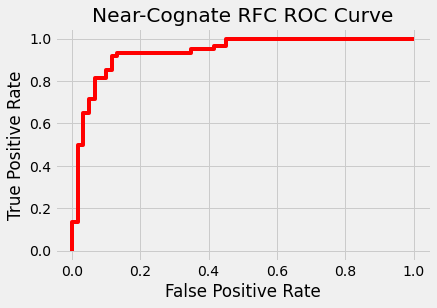

In [3]:
fpr, tpr, thresholds = roc_curve(test_y, rfc.predict_proba(test_X)[:,1])
pyplot.plot(fpr, tpr,color='red')
pyplot.title('Near-Cognate RFC ROC Curve')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()

# **Model Creation**

In [4]:
filename='Near-Cognate RFC/near-cognate'

#Subset containing positives, and a greater amount of negatives
train_X=pd.read_csv(filename+'_train_X.csv')
train_y=pd.read_csv(filename+'_train_y.csv')['Translated']


data_pos=sum(train_y==1)



#Negatives randomly sampled to be same amount as positives (to balance positives and negatives)
rfc_new = BalancedRandomForestClassifier(n_estimators=1000,min_samples_split = 2,max_samples=data_pos,sampling_strategy='not minority')


rfc_new.fit(train_X,train_y)


predictions = []

test_X = pd.read_csv(filename+'_test_X.csv').values
test_y = pd.read_csv(filename+'_test_y.csv')['Translated']

for i in range(len(test_y)):
    predictions = np.append(predictions, rfc_new.predict(test_X[i,:].reshape(1,-1)))        

#Calculate AUROC
auc = roc_auc_score(test_y, rfc_new.predict_proba(test_X)[:,1])
print('AUROC Score: %.3f' % auc)

#Because of sampling strategy, accuracy and AUROC scores may vary slightly with each run 
print('Accuracy:',sum(predictions==test_y)/len(test_y))

AUROC Score: 0.938
Accuracy: 0.85


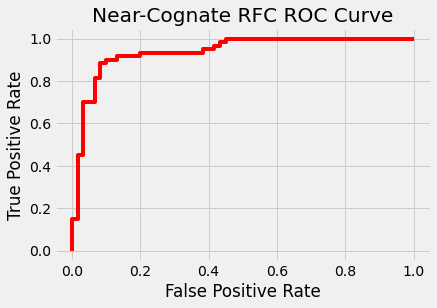

In [5]:
fpr, tpr, thresholds = roc_curve(test_y, rfc_new.predict_proba(test_X)[:,1])
pyplot.plot(fpr, tpr,color='red')
pyplot.title('Near-Cognate RFC ROC Curve')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()